## 1. Load Data  
Import libraries and load the dataset for Togo.  


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


### 2. Summary Statistics

Use `df.describe()` to get a quick overview of all numeric columns, including mean, standard deviation, min, max, and quartiles.

In [35]:
print("Summary statistics:")
print(df.describe())




Summary statistics:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50% 

### 3. Missing Value Report

Identify missing values per column to determine data completeness.  
This helps to plan imputation or cleaning strategies.


In [36]:
print("Missing values per column:")
df.isna().sum()


Missing values per column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### 4. Columns with More Than 5% Null Values

Calculate the percentage of missing values in each column and flag columns where the null rate exceeds 5%.


In [37]:
null_percent = df.isna().mean() * 100
print("Columns with more than 5% null values:")
null_percent[null_percent > 5]


Columns with more than 5% null values:


Comments    100.0
dtype: float64

### 5. Compute Z-scores for Outlier Detection

Calculate Z-scores for the main sensor and irradiance columns to detect outliers.  
Any data point with an absolute Z-score greater than 3 is considered an outlier.


In [38]:
# Compute Z-scores for selected numeric columns directly
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']], nan_policy='omit'))

# Create a mask for rows that are outliers in any of these columns
outlier_mask = (z_scores > 3).any(axis=1)

print(f"Number of outlier rows detected: {outlier_mask.sum()}")

# Optionally preview a few of those rows
print(f"Preview a few of rows containing outliers")
df[outlier_mask].head()


Number of outlier rows detected: 9251
Preview a few of rows containing outliers


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
4985,2021-10-28 11:06:00,1139.0,805.1,466.1,1172.0,1154.0,29.8,70.8,2.2,2.6,0.4,298.6,13.4,977,0,0.0,44.7,50.2,NaN
5410,2021-10-28 18:11:00,-1.2,0.0,0.0,0.0,0.0,29.7,63.5,6.6,9.7,1.6,122.1,14.3,976,0,0.0,30.0,29.5,NaN
5411,2021-10-28 18:12:00,-1.0,0.0,0.0,0.0,0.0,29.3,62.4,6.9,8.9,1.2,128.7,10.8,976,0,0.0,29.9,29.5,NaN
5413,2021-10-28 18:14:00,-0.8,0.0,0.0,0.0,0.0,28.6,63.7,7.1,8.9,1.1,127.9,14.4,976,0,0.0,29.5,29.2,NaN
5420,2021-10-28 18:21:00,-1.3,0.0,0.0,0.0,0.0,27.7,64.5,6.1,8.9,1.3,123.2,14.4,977,0,0.0,28.4,28.2,NaN


### 6. Handle Missing and Outlier Values

To clean the dataset:
- **Missing values** will be imputed using the **median** of each column.  
- **Outliers** (rows with |Z| > 3) will be removed to ensure reliable analysis.


In [39]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Drop outlier rows
df_clean = df[~outlier_mask].copy()

# Impute missing values with median
df_clean[key_columns] = df_clean[key_columns].fillna(df_clean[key_columns].median())

print(f"Cleaned dataset shape: {df_clean.shape}")


Cleaned dataset shape: (516349, 19)


### 7. Export Cleaned Dataset
Export the cleaned dataset for Benin to the `data/` directory.  


In [40]:
output_path = '../data/togo_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset exported to: {output_path}")


Cleaned dataset exported to: ../data/togo_clean.csv


## 8. Time Series Analysis
Visualize how solar irradiance and temperature variables (GHI, DNI, DHI, Tamb) change over time.  
Also observe patterns across months and hours to identify peaks, drops, or anomalies.


<Figure size 1400x600 with 0 Axes>

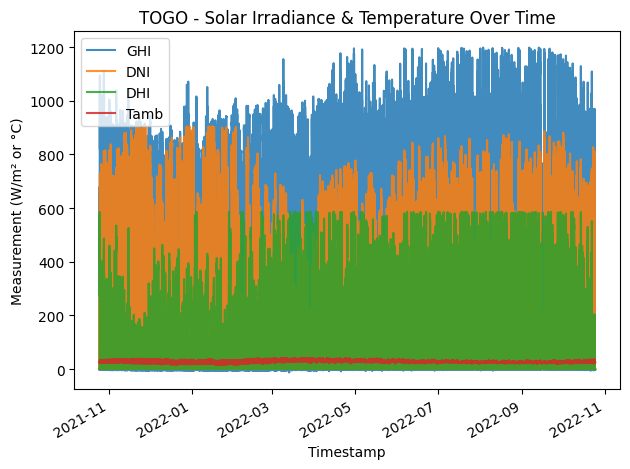

In [41]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb vs time
plt.figure(figsize=(14,6))
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(alpha=0.85)
plt.title("TOGO - Solar Irradiance & Temperature Over Time")
plt.ylabel("Measurement (W/m² or °C)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()


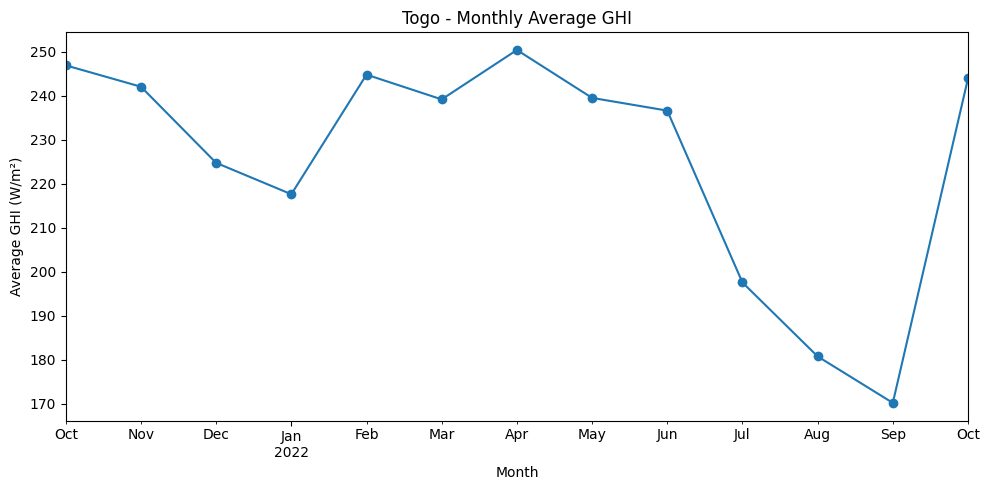

In [42]:
# Monthly average GHI
monthly_avg = df_clean.resample('ME').mean()

plt.figure(figsize=(10,5))
monthly_avg['GHI'].plot(marker='o', linestyle='-')
plt.title("Togo - Monthly Average GHI")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


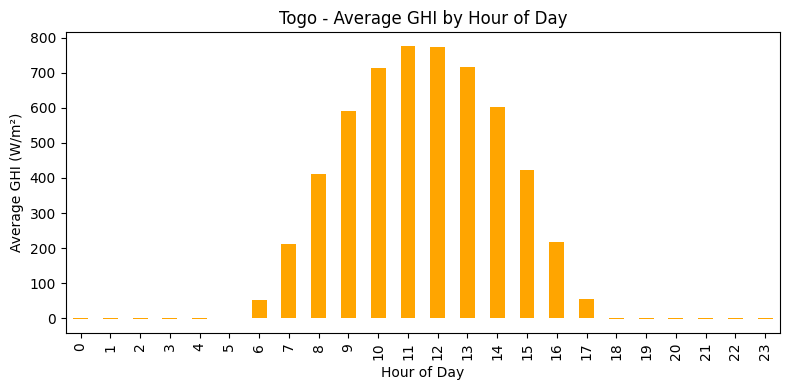

In [43]:
# Hourly pattern
df_clean['hour'] = df_clean.index.hour
hourly_avg = df_clean.groupby('hour')['GHI'].mean()

plt.figure(figsize=(8,4))
hourly_avg.plot(kind='bar', color='orange')
plt.title("Togo - Average GHI by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average GHI (W/m²)")
plt.tight_layout()
plt.show()


### 9. Cleaning Impact
Analyze how solar panel cleaning affects module readings (ModA & ModB).  
We compare average readings for cleaned vs uncleaned states.


Mean Module Readings by Cleaning Flag:
   Cleaning        ModA        ModB
0         0  219.217037  212.861920
1         1  528.864835  527.268498


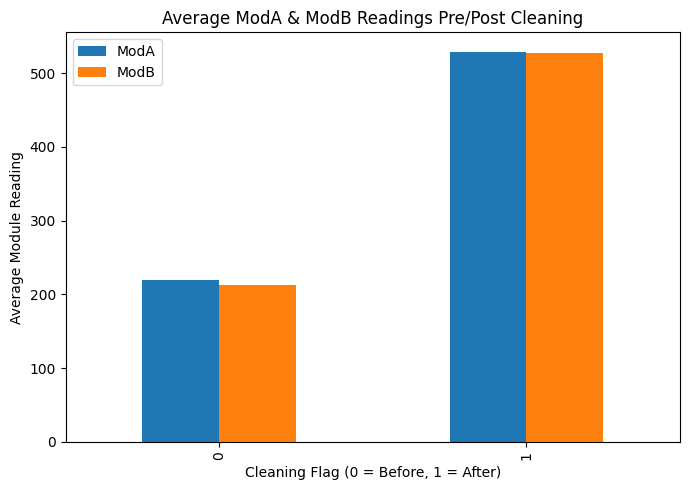

In [44]:
if 'Cleaning' in df_clean.columns:
    grouped = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
    print("Mean Module Readings by Cleaning Flag:")
    print(grouped)

    grouped.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar', figsize=(7,5))
    plt.title("Average ModA & ModB Readings Pre/Post Cleaning")
    plt.ylabel("Average Module Reading")
    plt.xlabel("Cleaning Flag (0 = Before, 1 = After)")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Cleaning' not found in dataset — skipping this step.")


### 10. Correlation & Relationship Analysis
Examine correlations between key solar parameters to identify which factors move together.  
A heatmap highlights strong positive or negative relationships.


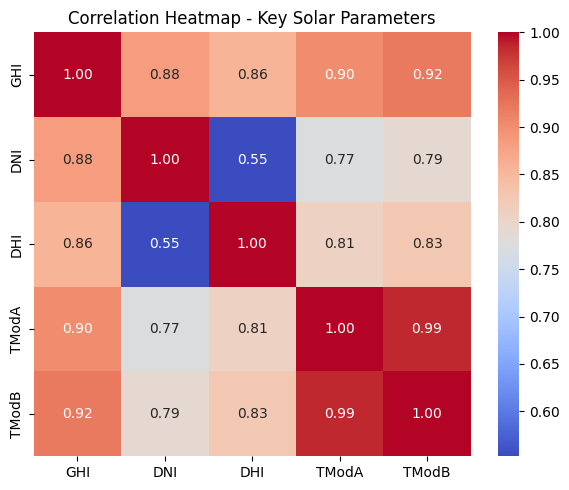

In [45]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(6,5))
sns.heatmap(df_clean[corr_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Key Solar Parameters")
plt.tight_layout()
plt.show()


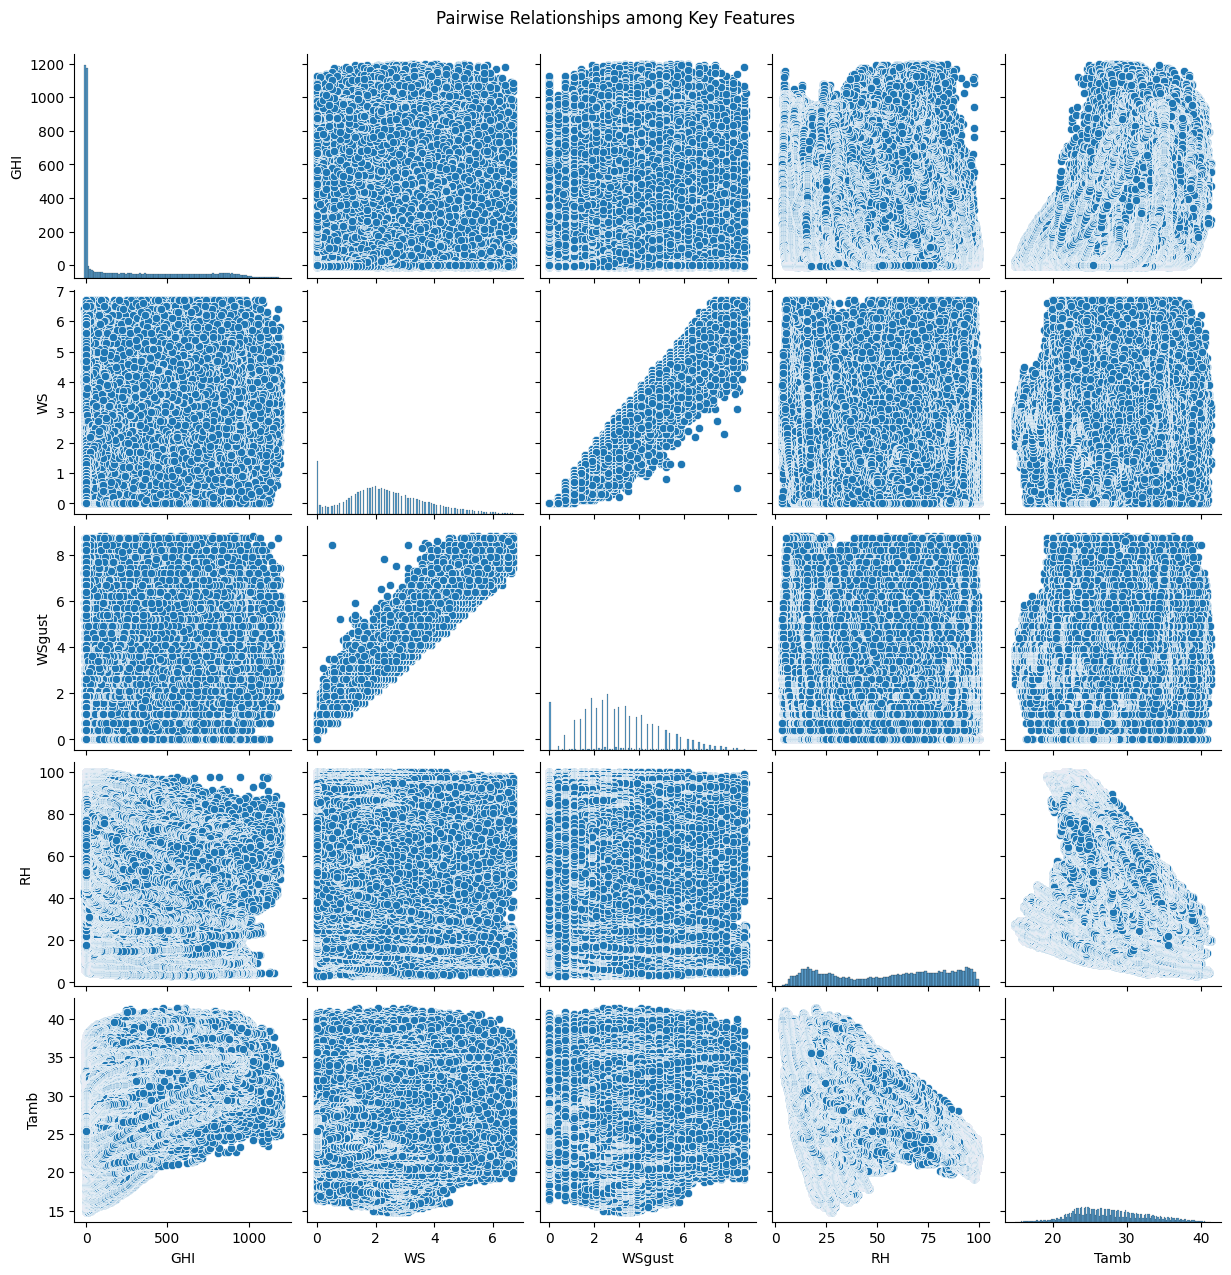

In [46]:
sns.pairplot(df_clean, vars=['GHI', 'WS', 'WSgust', 'RH', 'Tamb'], diag_kind='hist')
plt.suptitle("Pairwise Relationships among Key Features", y=1.02)
plt.show()


### 11. Wind & Distribution Analysis
Study wind behavior and irradiance distribution using histograms and wind direction patterns.


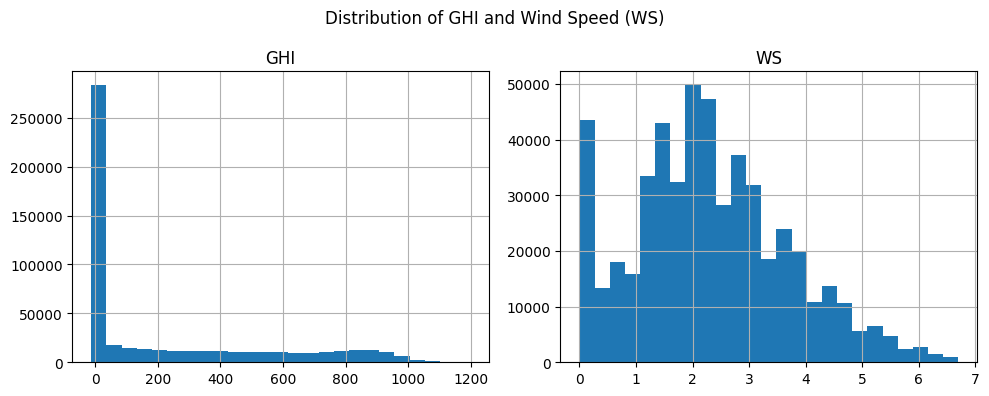

In [47]:
# Histograms for GHI and WS
df_clean[['GHI', 'WS']].hist(bins=25, figsize=(10,4))
plt.suptitle("Distribution of GHI and Wind Speed (WS)")
plt.tight_layout()
plt.show()


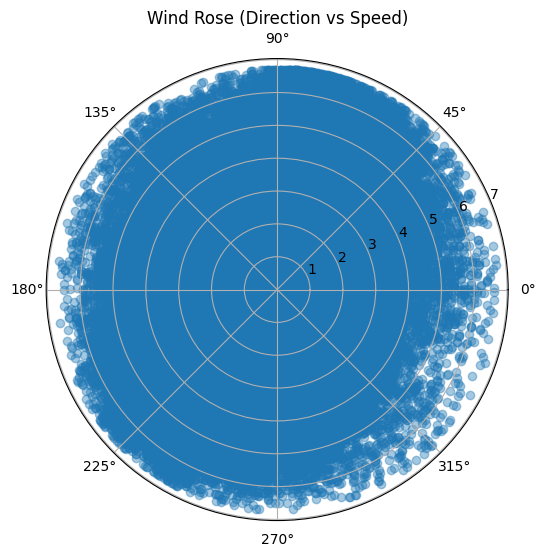

In [48]:
# Simple Wind Rose approximation (polar plot)
if 'WD' in df_clean.columns and 'WS' in df_clean.columns:
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    theta = np.deg2rad(df_clean['WD'])
    radii = df_clean['WS']
    ax.scatter(theta, radii, alpha=0.4)
    ax.set_title("Wind Rose (Direction vs Speed)")
    plt.show()


### 12. Temperature Analysis
Investigate how relative humidity (RH) influences temperature (Tamb) and solar irradiance (GHI).


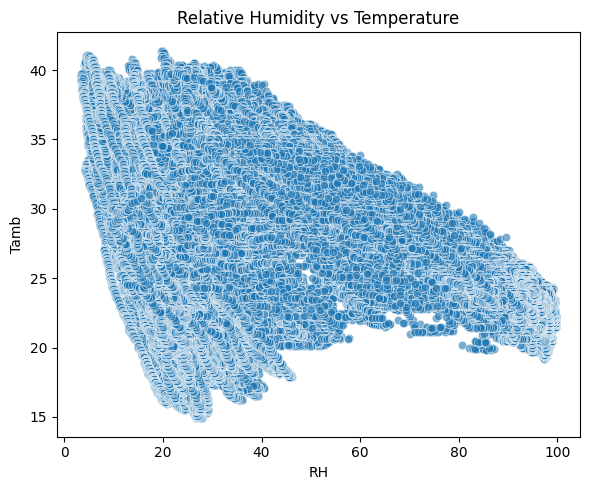

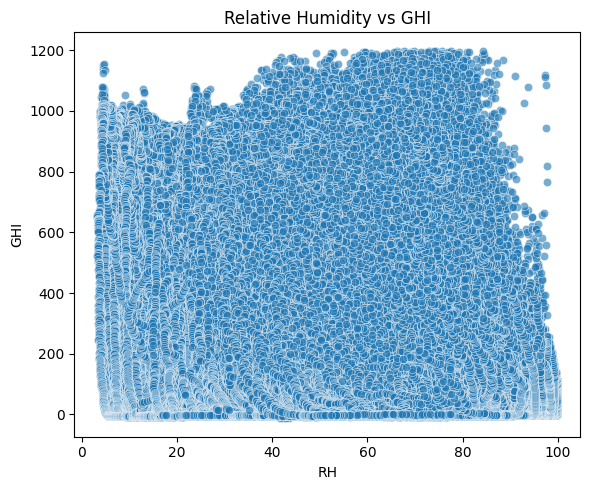

In [49]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.6)
plt.title("Relative Humidity vs Temperature")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.6)
plt.title("Relative Humidity vs GHI")
plt.tight_layout()
plt.show()


### 13. Bubble Chart
Create a bubble chart showing how temperature (Tamb) and humidity (RH) interact with solar radiation (GHI).  
Bubble size represents pressure (BP) or humidity (RH).


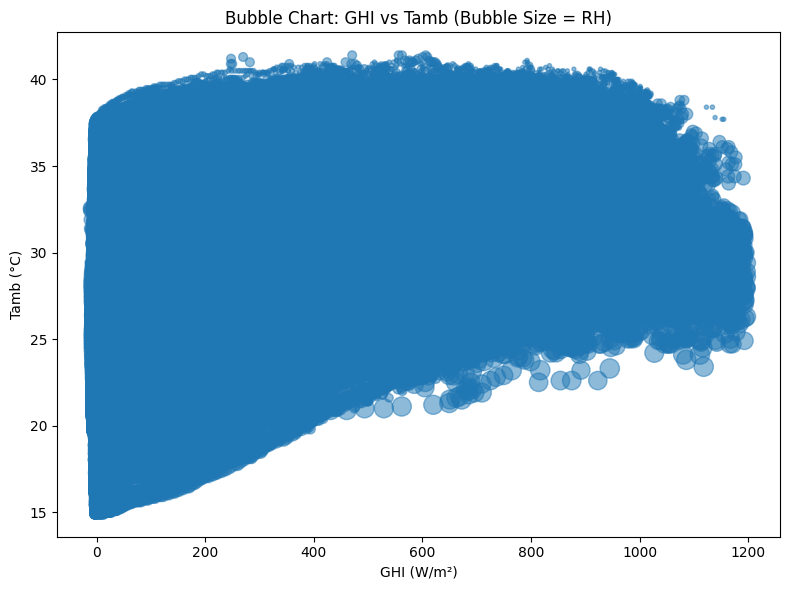

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH']*2, alpha=0.5)
plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Tamb (°C)")
plt.tight_layout()
plt.show()
